### 영화 관객수 예측

title : 영화의 제목

distributor : 배급사

genre : 장르

release_time : 개봉일

time : 상영시간(분)

screening_rat : 상영등급

director : 감독이름

dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)

dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)

num_staff : 스텝수

num_actor : 주연배우수

box_off_num : 관객수

1. 데이터 확인

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
!apt-get install fonts-nanum -qq > /dev/null
!fc-cache -fv
import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [62]:
train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')
submission = pd.read_csv('submission.csv')

In [63]:
# Train 데이터 5개 확인
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


* 신입 작가가 330명

In [10]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


1. 평균 상영 시간 : 100분

2. 평균 이전 관객수 : 100만

3. 평균 이전 영화 수 : 0.87

4. 평균 스태프 수 : 151명

5. 평균 배우 수 : 3.7명

6. 평균 관객수 : 70.8만

In [11]:
train.describe(include=['O'])

,title,distributor,genre,release_time,screening_rat,director
count,600,600,600,600,600,600
unique,600,169,12,330,4,472
top,개들의 전쟁,CJ 엔터테인먼트,드라마,2015-10-22,청소년 관람불가,홍상수
freq,1,54,221,6,204,7


7. 배급사 : 169개 (Top : CJ 54개)

8. 장르 : 12개(Top : 드라마 221개)

9. 상영등급 : 4개(Top : 청소년 관람불가 204개)

10. 감독 : 472명(Top : 홍상수 7개)

* Data Cleansing

Null값 정리

In [12]:
train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

dir_prev_bfnum : 이전 작품 관객수

따라서, Nan값 > 0으로 변경

In [13]:
train['dir_prev_bfnum'] = train['dir_prev_bfnum'].fillna(0)

In [14]:
train.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  600 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


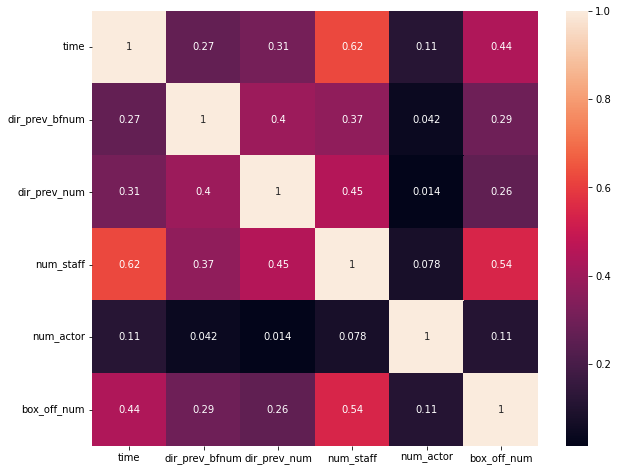

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot = True)
plt.show()

1. 관객 수 - 스태프의 수

2. 관객 수 - 상영시간

3. 상영시간 - 스태프의 수

4. 이전의 영화 수 - 스태프의 수

5. 이전 영화 수 - 이전 영화 관객 수

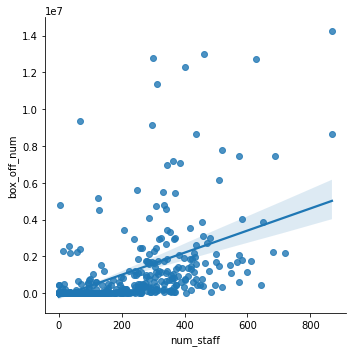

In [17]:
# 관객수 - 스태프의 수
sns.lmplot(x="num_staff", y="box_off_num", data=train)
plt.show()

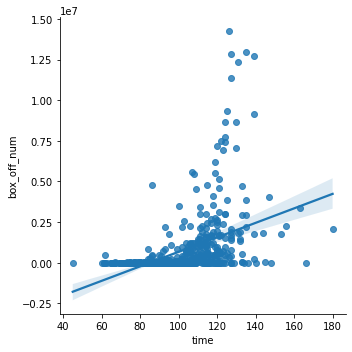

In [18]:
# 관객 수 - 상영시간
sns.lmplot(x="time", y="box_off_num", data=train)
plt.show()

상영시간이 100분 이상부터 관객수가 많은 것을 볼 수 있다.

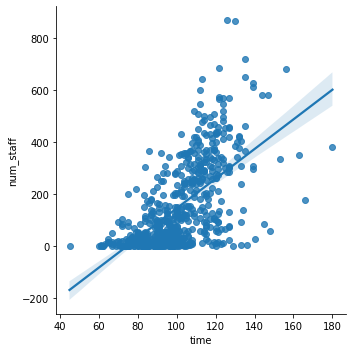

In [19]:
# 상영시간 - 스태프의 수
sns.lmplot(x="time", y="num_staff", data=train)
plt.show()

상영시간이 길어질수록 스태프의 숫자가 많아진다.

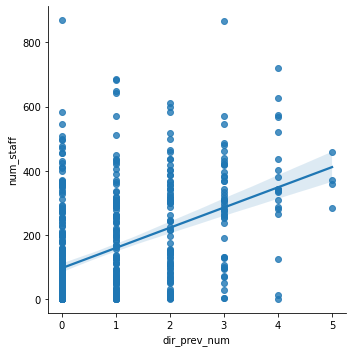

In [20]:
# 이전의 영화 수 - 스태프의 수
sns.lmplot(x="dir_prev_num", y="num_staff", data=train)
plt.show()

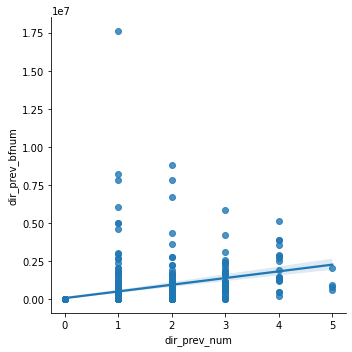

In [21]:
# 이전의 영화 수 - 이전 영화 관객 수
sns.lmplot(x="dir_prev_num", y="dir_prev_bfnum", data=train)
plt.show()

* 인사이트 도출

1. 상영 등급에 따른 관객 수

In [22]:
num_screening_rat = train.groupby('screening_rat').mean()['box_off_num'].sort_values(ascending=False)
num_screening_rat

screening_rat
15세 관람가     1.247519e+06
12세 관람가     8.449809e+05
청소년 관람불가    3.641813e+05
전체 관람가      1.351005e+05
Name: box_off_num, dtype: float64

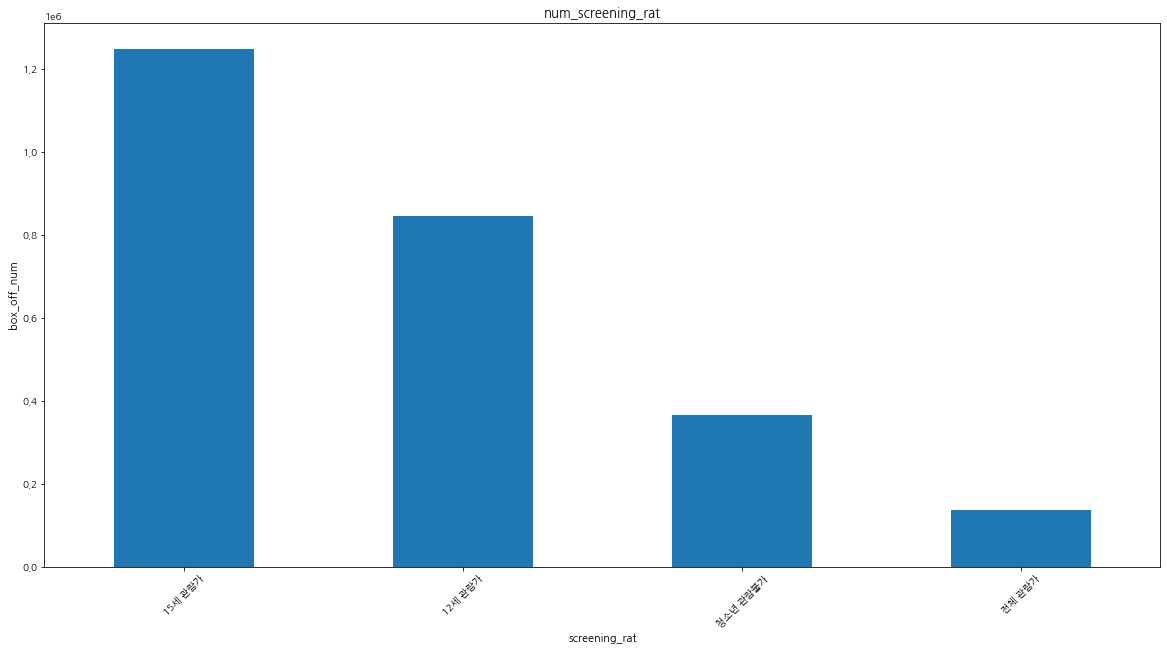

In [29]:
# 그래프 유틸 함수
def plot_bar(df, xlabel, ylabel, title, figsize=(20, 10), rotation=45):
    plt.rc('font', family = 'NanumGothic')
    plot = df.plot(kind='bar', figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

plot_bar(num_screening_rat, 'screening_rat', 'box_off_num', 'num_screening_rat')


2. 장르에 따른 관객 수

In [30]:
num_genre = train.groupby('genre').mean()['box_off_num'].sort_values(ascending=False)
num_genre

genre
느와르       2.263695e+06
액션        2.203974e+06
SF        1.788346e+06
코미디       1.193914e+06
드라마       6.256898e+05
공포        5.908325e+05
미스터리      5.275482e+05
멜로/로맨스    4.259680e+05
애니메이션     1.819267e+05
서스펜스      8.261100e+04
다큐멘터리     6.717226e+04
뮤지컬       6.627000e+03
Name: box_off_num, dtype: float64

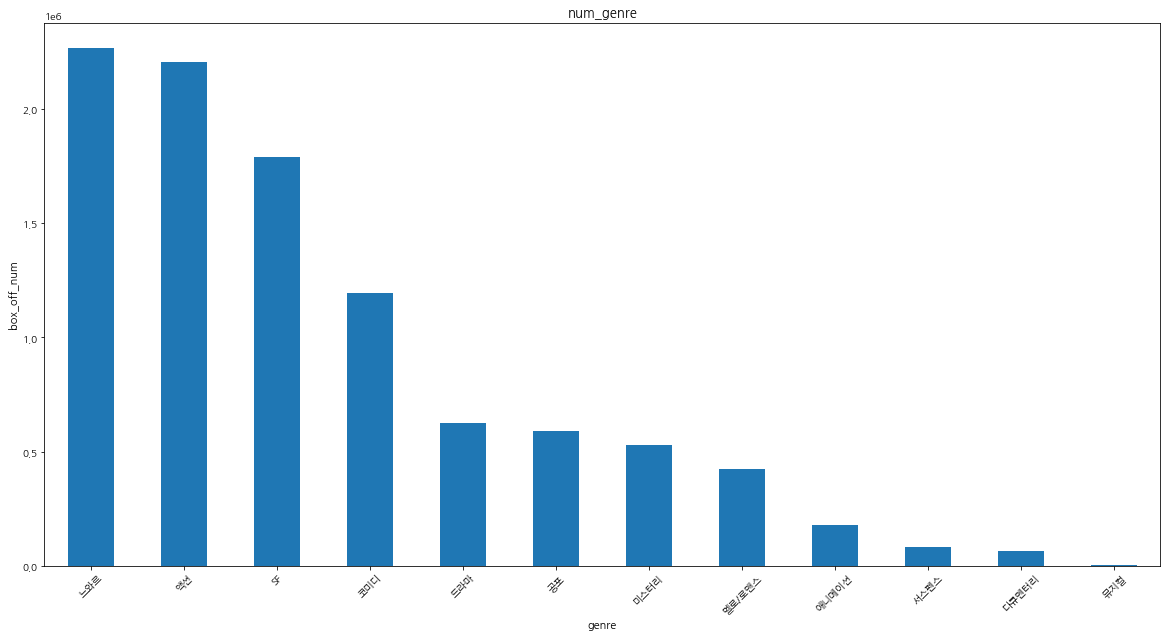

In [33]:
plot_bar(num_genre, 'genre', 'box_off_num', 'num_genre')

In [31]:
num_genre_rate = train.groupby(['genre','screening_rat']).mean()['box_off_num'].sort_values()
num_genre_rate

genre   screening_rat
애니메이션   15세 관람가          8.100000e+01
SF      청소년 관람불가         1.011333e+03
공포      12세 관람가          1.079000e+03
미스터리    청소년 관람불가         1.958500e+03
다큐멘터리   청소년 관람불가         2.788000e+03
뮤지컬     12세 관람가          3.089000e+03
        전체 관람가           7.511500e+03
다큐멘터리   15세 관람가          9.840706e+03
SF      전체 관람가           1.269600e+04
애니메이션   12세 관람가          1.318667e+04
        청소년 관람불가         1.421300e+04
다큐멘터리   12세 관람가          1.570848e+04
멜로/로맨스  전체 관람가           2.008100e+04
코미디     청소년 관람불가         3.894500e+04
멜로/로맨스  청소년 관람불가         7.200307e+04
코미디     전체 관람가           7.465733e+04
서스펜스    청소년 관람불가         8.261100e+04
다큐멘터리   전체 관람가           1.099162e+05
드라마     전체 관람가           1.581542e+05
        청소년 관람불가         2.339362e+05
애니메이션   전체 관람가           2.670129e+05
공포      청소년 관람불가         4.046408e+05
액션      12세 관람가          6.090630e+05
멜로/로맨스  15세 관람가          7.779760e+05
공포      15세 관람가          8.374626e+05
드라마     12세 관람가          8.8

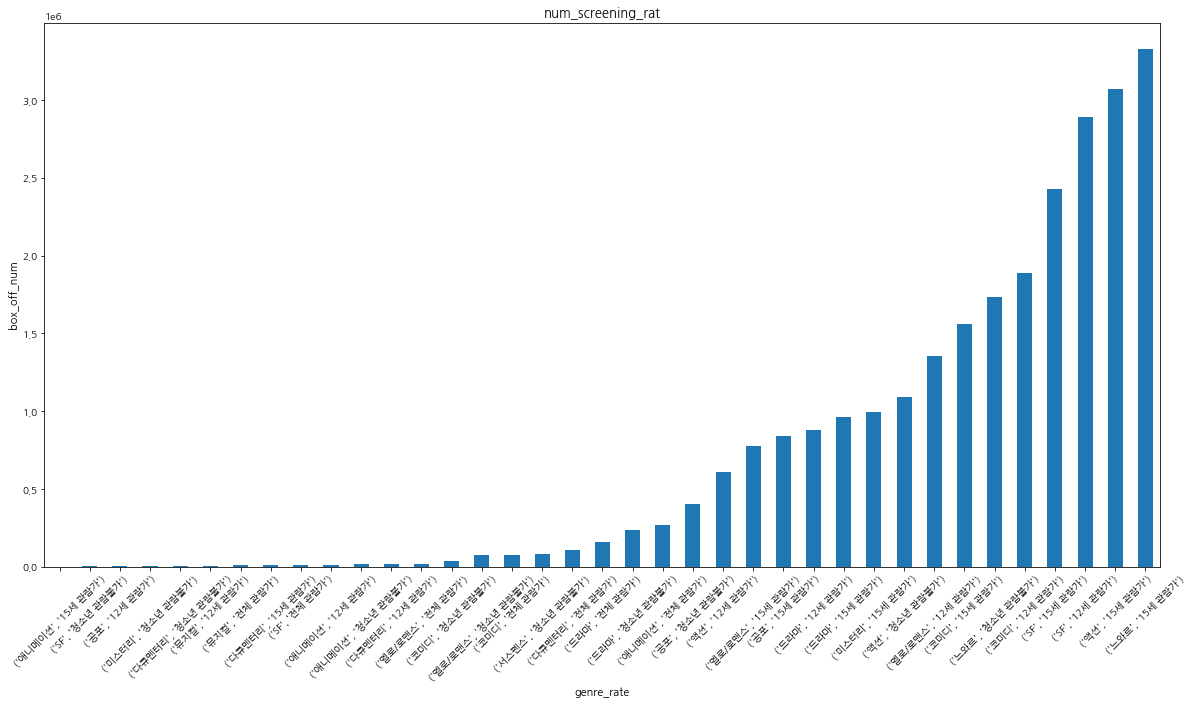

In [37]:
plot_bar(num_genre_rate, 'genre_rate', 'box_off_num', 'num_screening_rat')

1. 느와르 / 15세
2. 액션 / 15세
3. SF / 12세
4. SF / 15세
5. 느와르 / 청소년 관람 불가

3. 배급사에 따른 관객수


In [55]:
# 배급사
num_distributor_count = train.groupby('distributor').count()['box_off_num'].sort_values()
num_distributor_count

distributor
마법사필름               1
와이드 릴리즈(주)          1
와이드릴리즈(주)           1
두 엔터테인먼트            1
동국대학교 충무로영상제작센터     1
                   ..
인디스토리              26
(주)마운틴픽쳐스          29
(주)NEW             30
롯데엔터테인먼트           52
CJ 엔터테인먼트          54
Name: box_off_num, Length: 169, dtype: int64

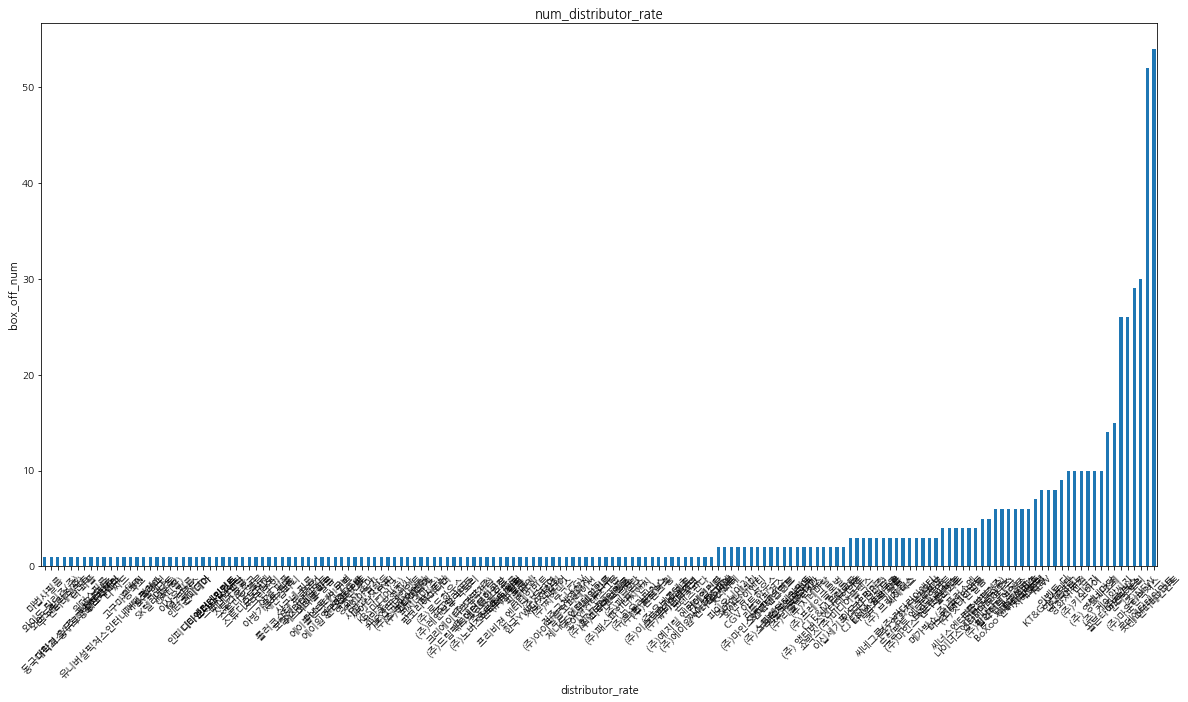

In [56]:
plot_bar(num_distributor_count, 'distributor_rate', 'box_off_num', 'num_distributor_rate')

In [53]:
num_genre_distributor_rate = train.groupby(['genre','distributor']).mean()['box_off_num'].sort_values()
num_genre_distributor_rate

genre   distributor    
드라마     인피니티엔터테인먼트         2.000000e+00
멜로/로맨스  고구마공작소             8.000000e+00
공포      사람과 사람들            4.200000e+01
드라마     위드시네마              4.600000e+01
멜로/로맨스  나우콘텐츠              5.400000e+01
                               ...     
코미디     (주)NEW             4.660994e+06
느와르     (주)쇼박스             4.744496e+06
액션      (주)쇼박스             5.182739e+06
코미디     CJ E&M Pictures    7.453715e+06
SF      롯데엔터테인먼트           8.666208e+06
Name: box_off_num, Length: 308, dtype: float64

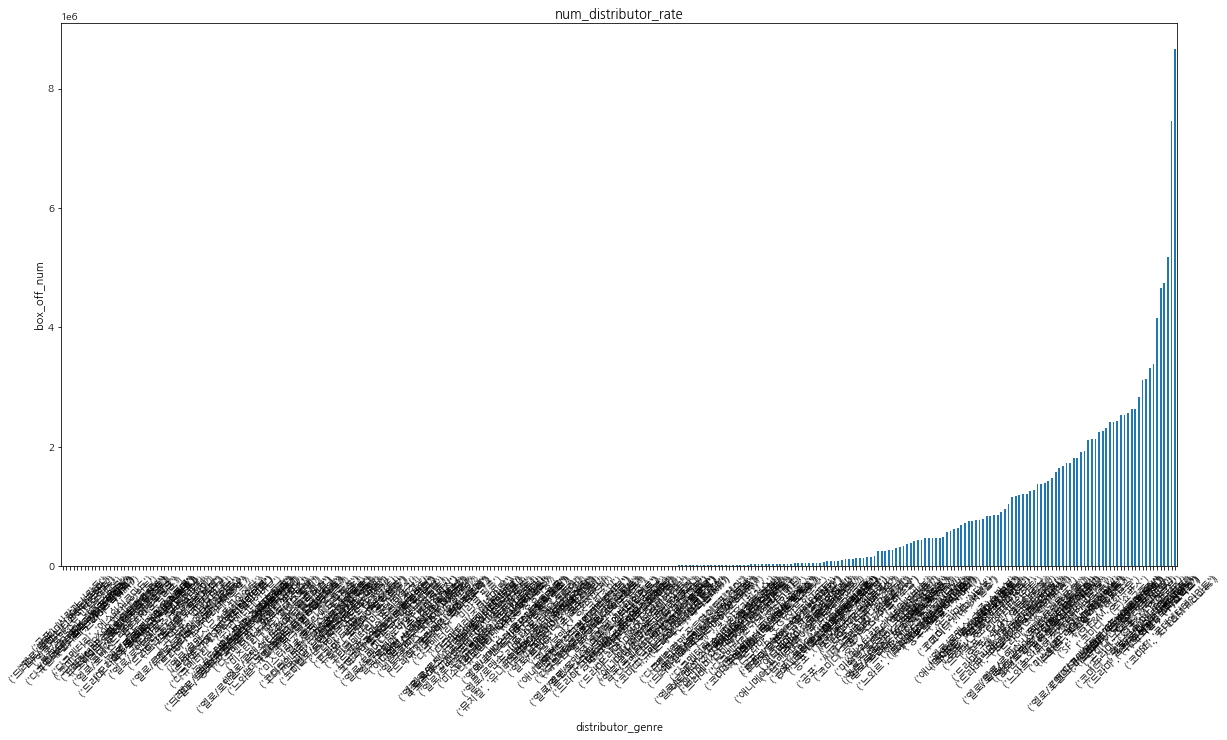

In [54]:
plot_bar(num_genre_distributor_rate, 'distributor_genre', 'box_off_num', 'num_distributor_rate')

4. 감독의 이전 영화 개수

In [68]:
num_dir_prev_num_rate = train.groupby(['dir_prev_num']).count()['box_off_num'].sort_values()
num_dir_prev_num_rate

dir_prev_num
5      4
4     20
3     47
2     86
1    113
0    330
Name: box_off_num, dtype: int64

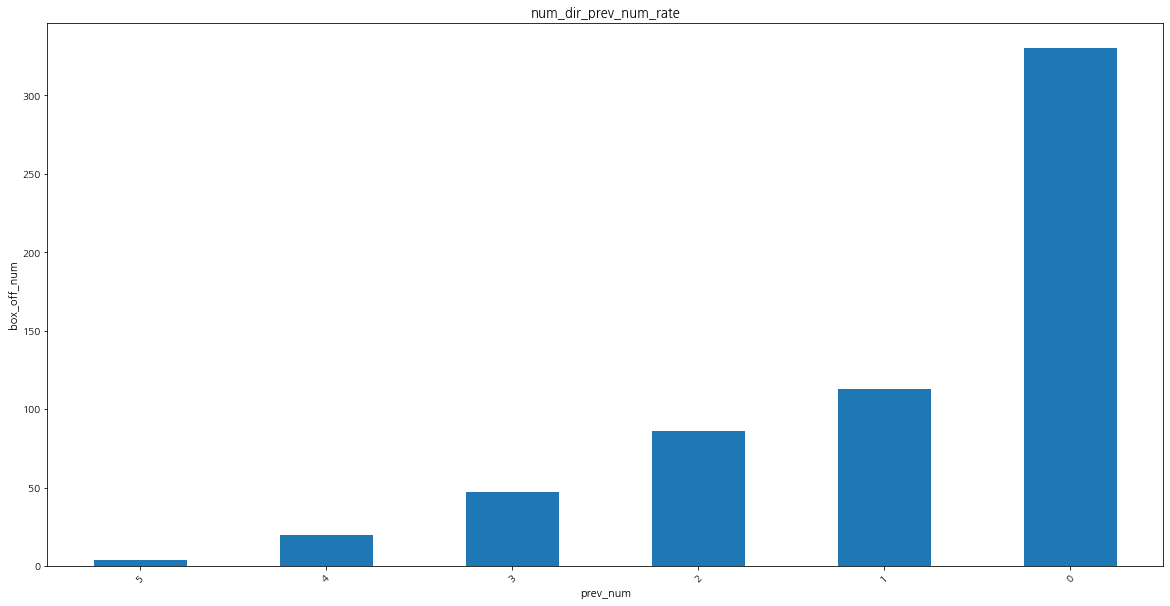

In [70]:
plot_bar(num_dir_prev_num_rate, 'prev_num', 'box_off_num', 'num_dir_prev_num_rate')

* 신입 감독이 많고, 작품 수가 커질수록 감독 수가 적어지는 것을 볼 수 있다.

In [69]:
num_dir_prev_num_mean = train.groupby(['dir_prev_num']).mean()['box_off_num'].sort_values()
num_dir_prev_num_mean

dir_prev_num
5    3.340028e+05
0    3.492043e+05
1    6.561018e+05
3    1.388813e+06
2    1.414767e+06
4    2.362598e+06
Name: box_off_num, dtype: float64

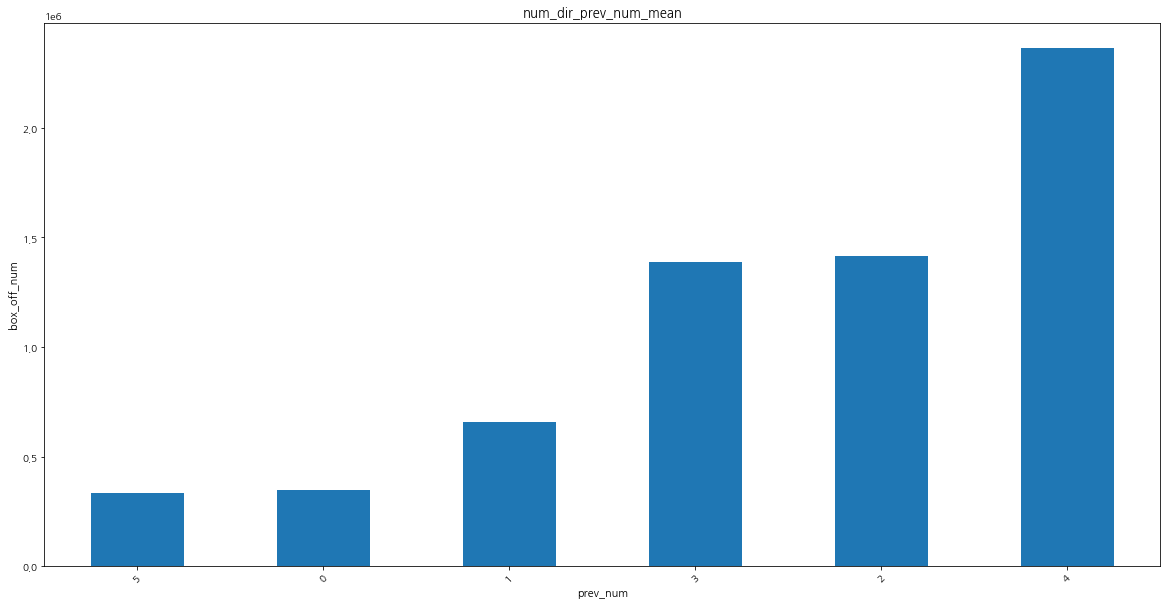

In [71]:
plot_bar(num_dir_prev_num_mean, 'prev_num', 'box_off_num', 'num_dir_prev_num_mean')

하지만, 평균적으로 4개의 작품을 찍은 감독의 작품을 관객들이 가장 많이 봤으며, 이후 2, 3, 1, 0, 5 순서이다.